In [2]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import nltk
from textblob import TextBlob

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Hotel%20Reviews%20from%20Chennai%2C%20India/chennai_reviews.csv")
df.head()

,Hotel_name,Review_Title,Review_Text,Sentiment,Rating_Percentage,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Accord Metropolitan,Excellent comfortableness during stay,Its really nice place to stay especially for b...,3,100,NaN,NaN,NaN,NaN
1,Accord Metropolitan,Not too comfortable,It seems that hotel does not check the basic a...,1,20,NaN,NaN,NaN,NaN
2,Accord Metropolitan,NaN,Worst hotel I have ever encountered. I will ne...,1,20,NaN,NaN,NaN,NaN
3,Accord Metropolitan,Best hotel,Had a good time in this hotel and the staff Ku...,3,100,NaN,NaN,NaN,NaN
4,Accord Metropolitan,NaN,good hotel and staff Veg food good non veg bre...,3,100,NaN,NaN,NaN,NaN


In [4]:
df.shape

(4768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4768 entries, 0 to 4767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hotel_name         4768 non-null   object 
 1   Review_Title       4341 non-null   object 
 2   Review_Text        4767 non-null   object 
 3   Sentiment          4766 non-null   object 
 4   Rating_Percentage  4767 non-null   object 
 5   Unnamed: 5         64 non-null     float64
 6   Unnamed: 6         3 non-null      object 
 7   Unnamed: 7         1 non-null      float64
 8   Unnamed: 8         1 non-null      float64
dtypes: float64(3), object(6)
memory usage: 335.4+ KB


In [6]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,Hotel_name,Review_Title,Review_Text,Sentiment,Rating_Percentage
0,Accord Metropolitan,Excellent comfortableness during stay,Its really nice place to stay especially for b...,3,100
1,Accord Metropolitan,Not too comfortable,It seems that hotel does not check the basic a...,1,20
2,Accord Metropolitan,NaN,Worst hotel I have ever encountered. I will ne...,1,20
3,Accord Metropolitan,Best hotel,Had a good time in this hotel and the staff Ku...,3,100
4,Accord Metropolitan,NaN,good hotel and staff Veg food good non veg bre...,3,100


In [7]:
values = {'Hotel_name': 'Unavailable', 'Review_Title': 'Unavailable', 'Review_Text': 'Unavailable'}
df = df.fillna(value=values)
df.head()

,Hotel_name,Review_Title,Review_Text,Sentiment,Rating_Percentage
0,Accord Metropolitan,Excellent comfortableness during stay,Its really nice place to stay especially for b...,3,100
1,Accord Metropolitan,Not too comfortable,It seems that hotel does not check the basic a...,1,20
2,Accord Metropolitan,Unavailable,Worst hotel I have ever encountered. I will ne...,1,20
3,Accord Metropolitan,Best hotel,Had a good time in this hotel and the staff Ku...,3,100
4,Accord Metropolitan,Unavailable,good hotel and staff Veg food good non veg bre...,3,100


In [8]:
df['Sentiment'] = df['Sentiment'].str.replace(r'[^0-9]','')
df['Rating_Percentage'] = df['Rating_Percentage'].str.replace(r'[^0-9]+','')
df['Sentiment'] = df['Sentiment'].str.replace(r'[s+]','')
df['Sentiment'] = df['Sentiment'].fillna(2)
df['Rating_Percentage'] = df['Rating_Percentage'].fillna(72)
df.head()

<ipython-input-8-16856a5a4cad>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Sentiment'] = df['Sentiment'].str.replace(r'[^0-9]','')
<ipython-input-8-16856a5a4cad>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Rating_Percentage'] = df['Rating_Percentage'].str.replace(r'[^0-9]+','')
<ipython-input-8-16856a5a4cad>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Sentiment'] = df['Sentiment'].str.replace(r'[s+]','')


,Hotel_name,Review_Title,Review_Text,Sentiment,Rating_Percentage
0,Accord Metropolitan,Excellent comfortableness during stay,Its really nice place to stay especially for b...,3,100
1,Accord Metropolitan,Not too comfortable,It seems that hotel does not check the basic a...,1,20
2,Accord Metropolitan,Unavailable,Worst hotel I have ever encountered. I will ne...,1,20
3,Accord Metropolitan,Best hotel,Had a good time in this hotel and the staff Ku...,3,100
4,Accord Metropolitan,Unavailable,good hotel and staff Veg food good non veg bre...,3,100


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

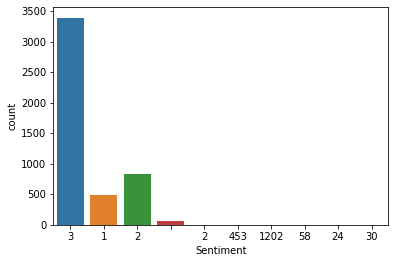

In [10]:
sns.countplot(df['Sentiment'])

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating_Percentage', ylabel='count'>

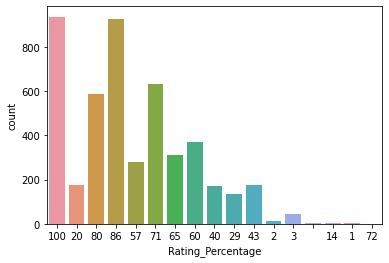

In [11]:
sns.countplot(df["Rating_Percentage"])

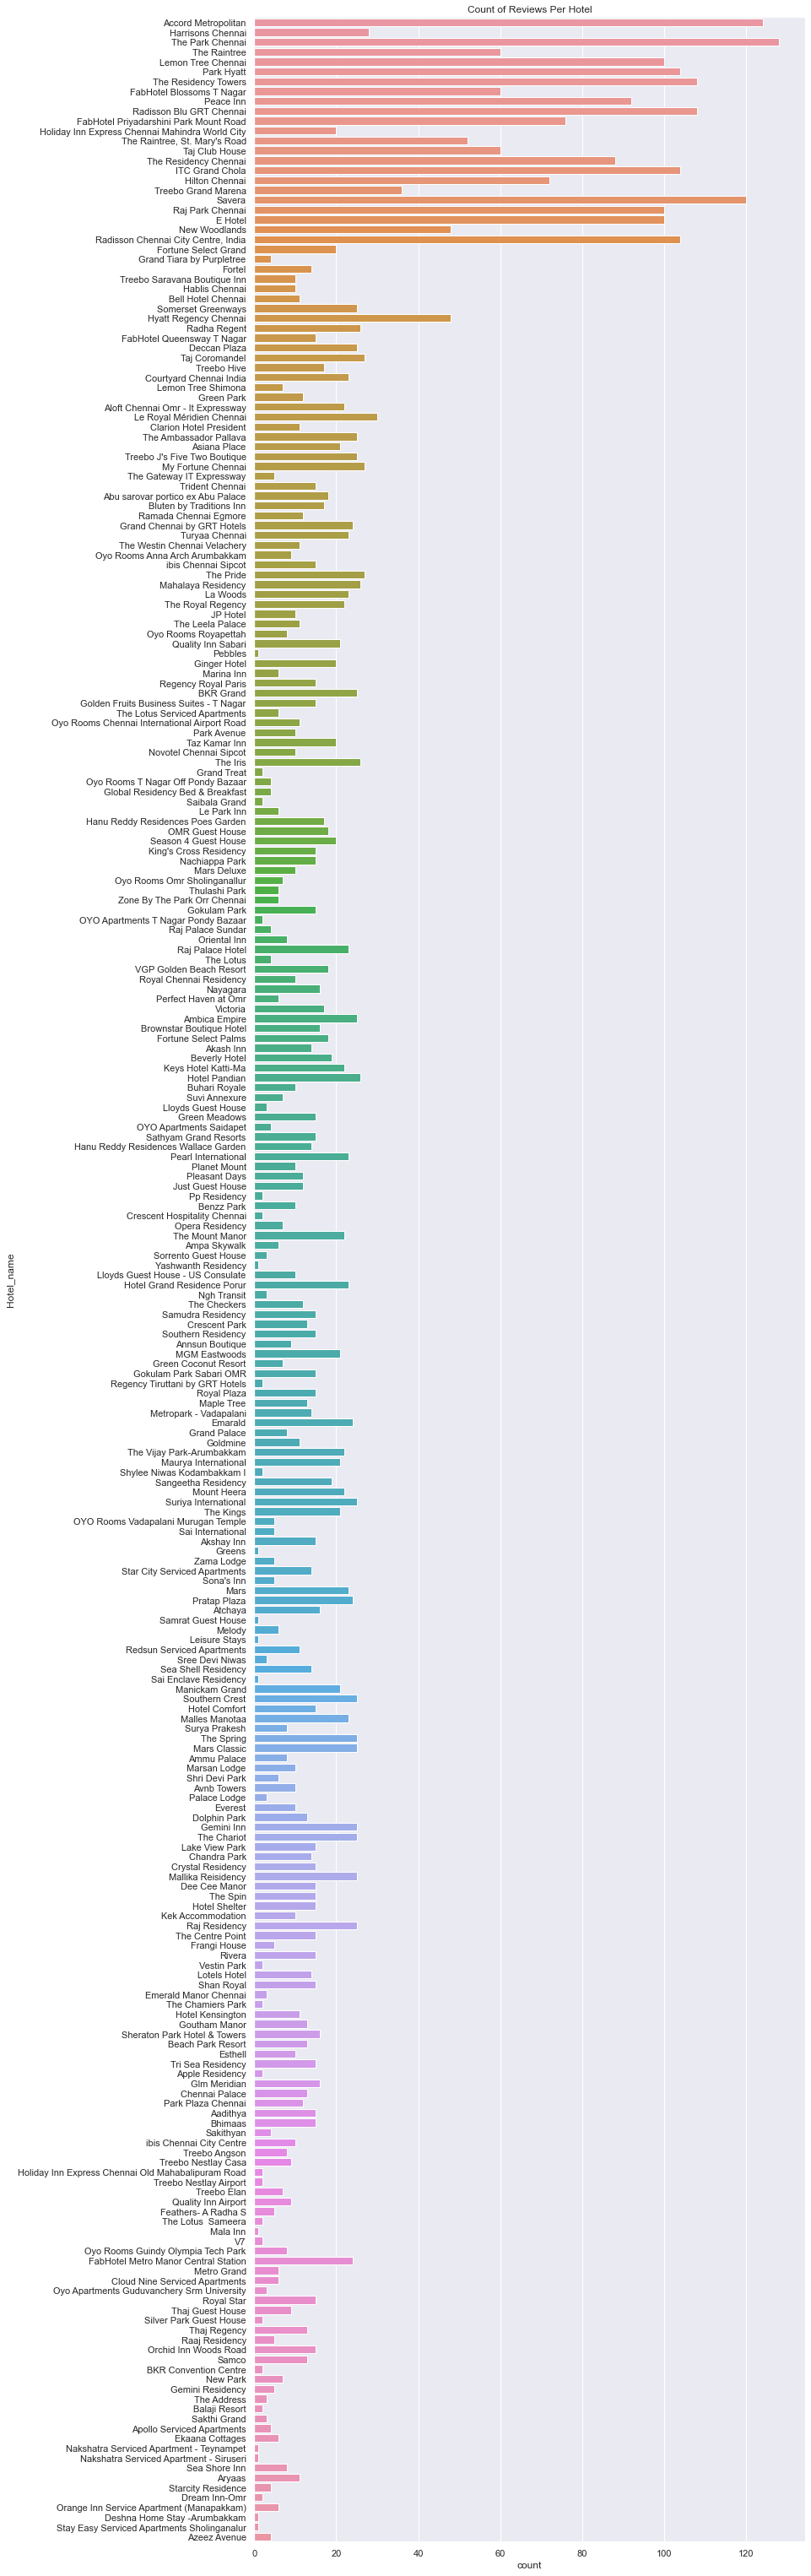

In [12]:
sns.set(rc={'figure.figsize':(11.7,55)})
sns.countplot(y=df['Hotel_name'],data=df).set_title('Count of Reviews Per Hotel')
sns.despine()

In [13]:
def preprocess(column_name):
    column_name = column_name.str.lower()
    column_name = column_name.str.replace(r"^[a-zA-Z]\s+","")
    column_name = column_name.str.replace(r"wouldn't","would not")
    column_name = column_name.str.replace(r"ain't","am not")
    column_name = column_name.str.replace(r"isn't","is not")
    column_name = column_name.str.replace(r"aren't","are not")
    column_name = column_name.str.replace(r"can't","can not")
    column_name = column_name.str.replace(r"shouldn't","should not")
    column_name = column_name.str.replace(r"shan't","shall not")
    column_name = column_name.str.replace(r"won't","will not")
    column_name = column_name.str.replace(r"hasn't","has not")
    column_name = column_name.str.replace(r"hadn't","had not")
    column_name = column_name.str.replace(r"don't","do not")
    column_name = column_name.str.replace(r"couldn't","could not")
    column_name = column_name.str.replace(r"didn't","did not")
    column_name = column_name.str.replace(r"aint","am not")
    column_name = column_name.str.replace(r"isnt","is not")
    column_name = column_name.str.replace(r"wouldnt","would not")
    column_name = column_name.str.replace(r"aint","am not")
    column_name = column_name.str.replace(r"isnt","is not")
    column_name = column_name.str.replace(r"arent","are not")
    column_name = column_name.str.replace(r"cant","can not")
    column_name = column_name.str.replace(r"shouldnt","should not")
    column_name = column_name.str.replace(r"shant","shall not")
    column_name = column_name.str.replace(r"wont","will not")
    column_name = column_name.str.replace(r"hasnt","has not")
    column_name = column_name.str.replace(r"hadnt","had not")
    column_name = column_name.str.replace(r"dont","do not")
    column_name = column_name.str.replace(r"couldnt","could not")
    column_name = column_name.str.replace(r"didnt","did not")
    column_name = column_name.str.replace(r"aint","am not")
    column_name = column_name.str.replace(r"isnt","is not")    

    
    return column_name
df.Review_Title = preprocess(df.Review_Title)
df.Review_Text = preprocess(df.Review_Text)
df.head()

<ipython-input-13-05fa36f0e1b3>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  column_name = column_name.str.replace(r"^[a-zA-Z]\s+","")


,Hotel_name,Review_Title,Review_Text,Sentiment,Rating_Percentage
0,Accord Metropolitan,excellent comfortableness during stay,its really nice place to stay especially for b...,3,100
1,Accord Metropolitan,not too comfortable,it seems that hotel does not check the basic a...,1,20
2,Accord Metropolitan,unavailable,worst hotel i have ever encountered. i will ne...,1,20
3,Accord Metropolitan,best hotel,had a good time in this hotel and the staff ku...,3,100
4,Accord Metropolitan,unavailable,good hotel and staff veg food good non veg bre...,3,100


In [16]:
#Remove StopWords
def stopwords_removal(dfCol):
    
    dfCol = dfCol.astype(str)
    for j in range(dfCol.size):
        sentences = nltk.word_tokenize(dfCol[j])
        for i in range(len(sentences)):
            words = nltk.word_tokenize(sentences[i])
            newWords = [word for word in words if word not in stopwords.words('english')]
            sentences[i] = ' '.join(newWords)
    return dfCol
df.head(563)

,Hotel_name,Review_Title,Review_Text,Sentiment,Rating_Percentage
0,Accord Metropolitan,excellent comfortableness during stay,its really nice place to stay especially for b...,3,100
1,Accord Metropolitan,not too comfortable,it seems that hotel does not check the basic a...,1,20
2,Accord Metropolitan,unavailable,worst hotel i have ever encountered. i will ne...,1,20
3,Accord Metropolitan,best hotel,had a good time in this hotel and the staff ku...,3,100
4,Accord Metropolitan,unavailable,good hotel and staff veg food good non veg bre...,3,100
...,...,...,...,...,...
558,Somerset Greenways,"good, food choices needs to improve","good, well connected to the city, value for mo...",3,80
559,Somerset Greenways,this is not a 5 star hotel,at best i would rate it 4 star. the restaurant...,2,60
560,Somerset Greenways,5 star deserving hotel,excellent place to stay in chennai. almost a 5...,3,100
561,Somerset Greenways,it is an ok service hotel,the buffet breakfast was not up to the 4 star ...,3,80


In [17]:
def sentiment_analysis_fxn(hotel_name):
    
    if df[df.Hotel_name == hotel_name].empty:
        print("This hotel name does not exists !")
        
    else:
        review_title = df[df.Hotel_name == hotel_name].iloc[:,1].to_string()
        title_analysis = TextBlob(review_title)
        review_title_polarity = title_analysis.sentiment.polarity
        
        review_text = df[df.Hotel_name == hotel_name].iloc[:,2].to_string()
        text_analysis = TextBlob(review_text)
        review_text_polarity = text_analysis.sentiment.polarity
        
        
        sentiment_sum_value = 0
        review_sentiment = df[df.Hotel_name == hotel_name].iloc[:,3].tolist()
        for i in range(len(review_sentiment)):
            sentiment_sum_value = sentiment_sum_value + int(review_sentiment[i])
        
        sentiment_sum_value /= len(review_sentiment)
        
        
        rating_sum_value = 0
        review_rating = df[df.Hotel_name == hotel_name].iloc[:,4].tolist()
        for i in range(len(review_rating)):
            rating_sum_value = rating_sum_value + int(review_rating[i])
            
        rating_sum_value /= (len(review_rating) * 72)
        
        total_polarity = review_text_polarity + review_title_polarity + sentiment_sum_value + rating_sum_value
        
        print("Score for "+hotel_name.upper()+" out of 7 is: ", total_polarity)

In [18]:
sentiment_analysis_fxn('Accord Metropolitan')
sentiment_analysis_fxn('Somerset Greenways')
sentiment_analysis_fxn('Bell Hotel Chennai')

Score for ACCORD METROPOLITAN out of 7 is:  5.122710646130002
Score for SOMERSET GREENWAYS out of 7 is:  5.040722724987431
Score for BELL HOTEL CHENNAI out of 7 is:  4.216926221926222


In [1]:
def sentiment_analysis_insights(hotel_name):
    print("** SENTIMENT ANALYSIS RESULT OF HOTEL:",hotel_name.upper()+" **\n\n")
    Neutral = 0
    Weak_Positive = 0
    Mild_Positive = 0
    Strong_Positive = 0
    Weak_Negative = 0
    Mild_Negative = 0
    Strong_Negative = 0

    if df[df.Hotel_name == hotel_name].empty:
        print("This hotel name does not exists !")
        
    else:
        review_title = df[df.Hotel_name == hotel_name].iloc[:,1]
        for values in review_title:
            title_analysis = TextBlob(values)
            review_title_polarity = title_analysis.sentiment.polarity
            
            if(review_title_polarity == 0 ):
                Neutral += 1
    
            elif(review_title_polarity > 0 and review_title_polarity < .3):
                Weak_Positive += 1
            
            elif(review_title_polarity >= .3  and review_title_polarity < .6):
                Mild_Positive += 1
        
            elif(review_title_polarity >= .6 and review_title_polarity <= 1 ):
                Strong_Positive += 1
              
            elif(review_title_polarity >= -.3 and review_title_polarity < 0):
                Weak_Negative += 1
        
            elif(review_title_polarity >= -.6 and review_title_polarity < -.3):
                Mild_Negative += 1
        
            elif(review_title_polarity >= -1 and review_title_polarity < -.6):
                Strong_Negative += 1
        
        
        
        print('********************************************************')    
        print('TOTAL NEUTRAL IS:' + str(Neutral))
        print('TOTAL WEAK POSITIVE IS:' + str(Weak_Positive))
        print('TOTAL MILDLY POSITIVE IS:' + str(Mild_Positive))
        print('TOTAL STRONGLY POSITIVE IS:' + str(Strong_Positive))
        print('TOTAL WEAKLY NEGATIVE IS:' + str(Weak_Negative))
        print('TOTAL MILDY NEGATIVE IS:' + str(Mild_Negative))
        print('TOTAL STRONGLY NEGATIVE IS:' + str(Strong_Negative))
        print('********************************************************')    

        plt.figure(figsize=[6,6])
        labels = 'Weak Positive','Mild Positive','Strong Positive', 'Neutral', 'Weak Negative', 'Mild Negative', 'Strong Negative'
        sizes = [Weak_Positive, Mild_Positive, Strong_Positive, Neutral, Weak_Negative, Mild_Negative, Strong_Negative]
        colors = ['blue', 'yellow', 'green','white','grey','maroon','red']
        explode = (0.0,0.0,1.0,0.0,0.0,0.0,0.0)
        plt.pie(sizes,explode = explode, labels=labels, colors=colors, 
                autopct='%1.1f%%', shadow=True, startangle=140, radius = 90000)
        plt.axis('equal')
        plt.title('Visualization with 7 categories\n\n\n')
        plt.show()
        
        plt.figure(figsize=[6,6])
        labels = 'Positive', 'Neutral', 'Negative'
        sizes = [Weak_Positive + Mild_Positive + Strong_Positive, Neutral, Weak_Negative + Mild_Negative + Strong_Negative]
        colors = ['blue', 'green','red']
        explode = (0.0,0.0,0.0)
        plt.pie(sizes,explode = explode, labels=labels, colors=colors, 
                autopct='%1.1f%%', shadow=True, startangle=140, radius = 90000)
        plt.axis('equal')
        plt.title('Visualization with 3 categories\n')
        plt.show()

In [2]:

def get_WordCloud(hotel_name):
    
    if df[df.Hotel_name == hotel_name].empty:
        print("This hotel name does not exists !")
        
    else:
        review_text = df[df.Hotel_name == hotel_name].iloc[:,2].to_string()
        
        wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(review_text)
        plt.figure(figsize=(10,10))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis('off')
        plt.title("WordCloud for "+hotel_name.upper())
        plt.show